<a href="https://colab.research.google.com/github/mikexcohen/Statistics_book/blob/main/stats_ch05_simulating_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modern statistics: Intuition, Math, Python, R
## Mike X Cohen (sincxpress.com)
#### https://www.amazon.com/dp/B0CQRGWGLY
#### Code for chapter 5 (simulating data)

---

# About this code file:

### This notebook will reproduce most of the figures in this chapter (some figures were made in Inkscape), and illustrate the statistical concepts explained in the text. The point of providing the code is not just for you to recreate the figures, but for you to modify, adapt, explore, and experiment with the code.

### Solutions to all exercises are at the bottom of the notebook.

#### This code was written in google-colab. The notebook may require some modifications if you use a different IDE.

In [1]:
# import libraries and define global settings
import numpy as np
import matplotlib.pyplot as plt

# define global figure properties used for publication
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'savefig.dpi':300,          # output resolution
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Figure 5.2: Normally distributed random data

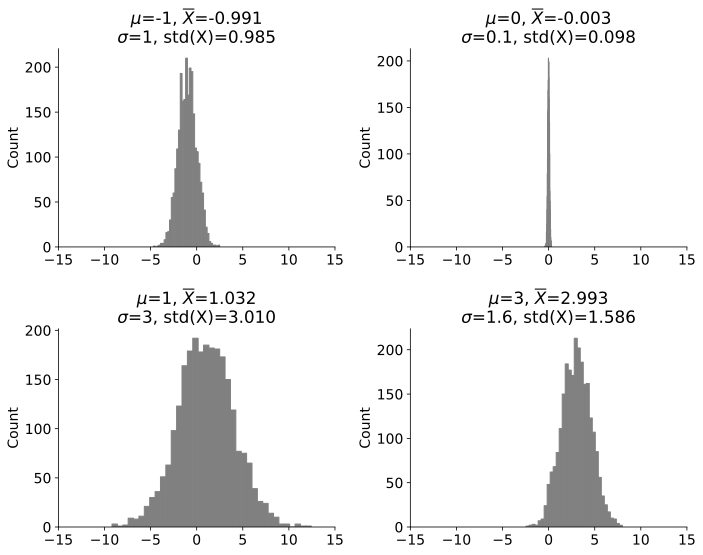

In [2]:
# parameters for the distributions
means = [ -1,0,1,3 ]
stds  = [1,.1,3,1.6 ]
samplesize = 2500

_,axs = plt.subplots(2,2,figsize=(10,8))

for idx,axis in enumerate( axs.flatten() ):

  # generate some data
  X = np.random.normal(loc=means[idx],scale=stds[idx],size=samplesize)

  # compute empirical mean and std
  empave = np.mean(X)
  empstd = np.std(X,ddof=1)

  # draw the histogram using the F-D rule for bin width
  axis.hist(X,bins='fd',color='gray',edgecolor='gray')
  axis.set(xlim=[-15,15],ylabel='Count')
  axis.set_title(f'$\\mu$={means[idx]}, $\\overline{{X}}$={empave:.3f}\n$\\sigma$={stds[idx]}, std(X)={empstd:.3f}',loc='center')


plt.tight_layout()
plt.savefig('simdat_normal4examples.png')
plt.show()

# Figure 5.4: Uniformly distributed random data

In [3]:
a,b = np.sort( np.random.randint(-3,11,2) )
N = 1001

Y = np.random.uniform(a,b,size=N)

print(a,b,np.min(a),np.max(b))
print('')
print(np.mean(Y),(a+b)/2,np.median(Y))
print(np.var(Y,ddof=1),(b-a)**2/12)

4 10 4 10

6.912778728602393 7.0 6.826249073042077
3.096335560225271 3.0


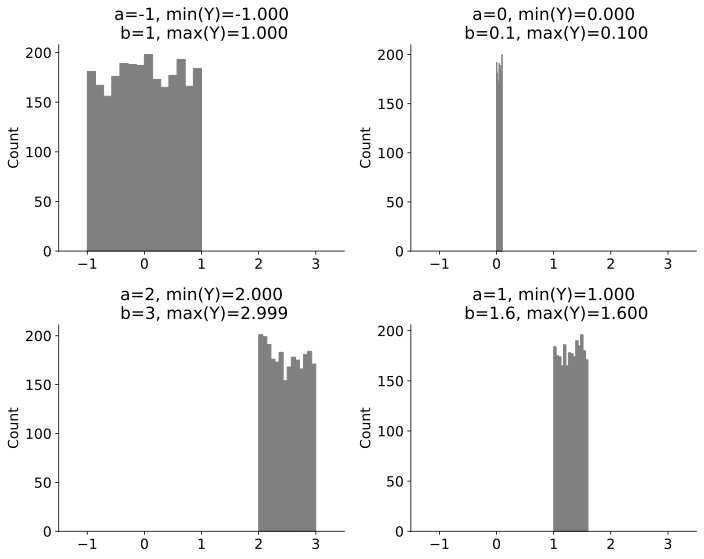

In [4]:
# parameters for the distributions
aa = [ -1,  0, 2,  1  ]
bb = [  1, .1, 3, 1.6 ]
samplesize = 2500

_,axs = plt.subplots(2,2,figsize=(10,8))

for idx,axis in enumerate( axs.flatten() ):

  # generate some data
  X = np.random.uniform(aa[idx],bb[idx],size=samplesize)

  # compute empirical boundaries
  bndL = np.min(X)
  bndU = np.max(X)

  # draw the histogram using the F-D rule for bin width
  axis.hist(X,bins='fd',color='gray',edgecolor='gray')
  axis.set(xlim=[-1.5,3.5],ylabel='Count')
  axis.set_title(f'a={aa[idx]}, min(Y)={bndL:.3f}\n b={bb[idx]}, max(Y)={bndU:.3f}',loc='center')


plt.tight_layout()
plt.savefig('simdat_uniform4examples.png')
plt.show()

# Figure 5.5: Example Weibull distribution

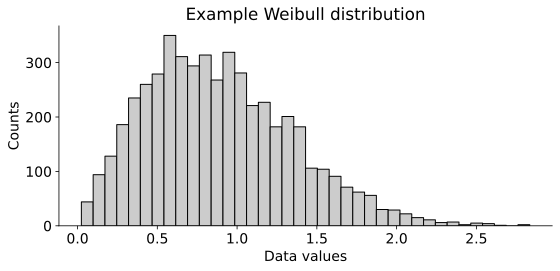

In [5]:
# some data
X = np.random.weibull(2,5000)

# create a histogram
plt.figure(figsize=(8,4))
plt.hist(X,'fd',color=(.8,.8,.8),edgecolor='k')
plt.xlabel('Data values')
plt.ylabel('Counts')
plt.title('Example Weibull distribution',loc='center')

plt.tight_layout()
plt.savefig('simdat_weibull.png')
plt.show()

**Weibull distribution**: A continuous distribution often used to model time-to-failure or survival data (e.g., how long until a lightbulb burns out). Its shape parameter controls whether failure rate increases, decreases, or stays constant over time—making it flexible for reliability analysis and life data modeling.

# Figure 5.6: Example log-normal distribution

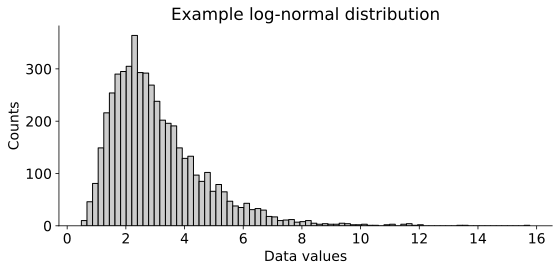

In [6]:
# generate the data using a normal distribution passed through an exponential
Y = np.random.normal(0,1,size=5000)
X = np.exp( Y*.5 + 1 )

# you can also use the built-in numpy function
#X = np.random.lognormal(1,1/2,5000)

# create a histogram
plt.figure(figsize=(8,4))
plt.hist(X,bins=80,color=(.8,.8,.8),edgecolor='k')
plt.xlabel('Data values')
plt.ylabel('Counts')
plt.title('Example log-normal distribution',loc='center')

plt.tight_layout()
plt.savefig('simdat_lognormal.png')
plt.show()

# Random integers

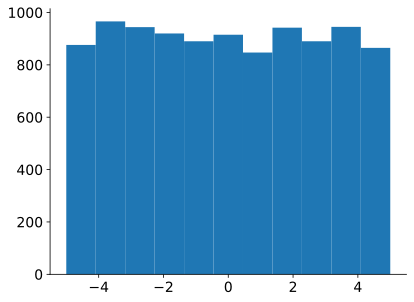

In [7]:
z = np.random.randint(-5,6,size=10000)

plt.hist(z,bins=len(set(z)));

[-40. -36. -35. -34. -32. -31. -30. -29. -28. -27. -26. -25. -24. -23.
 -22. -21. -20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.
  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.  -0.   1.   2.   3.   4.   5.
   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.
  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.
  34.  35.]


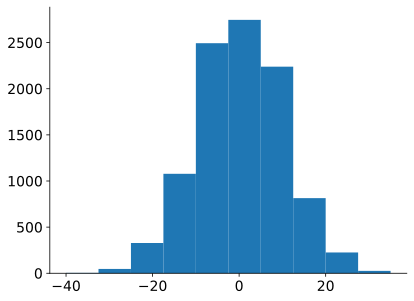

In [8]:
z = np.round(np.random.randn(10000)*10)
print(np.unique(z))
plt.hist(z);

# Random selection

In [9]:
s = [1,2,np.pi,10]
np.random.choice(s,1)

array([10.])

In [10]:
# not limited to numbers
t = ['a','b','hello']
np.random.choice(t,1)

array(['b'], dtype='<U5')

In [11]:
np.random.choice(s,4)

array([10.        ,  3.14159265,  3.14159265,  3.14159265])

In [12]:
np.random.choice(s,4,replace=False)

array([10.        ,  3.14159265,  1.        ,  2.        ])

# Random permutations

In [13]:
l = np.arange(5)
print(l)
print(np.random.permutation(l))

[0 1 2 3 4]
[0 4 2 3 1]


In [14]:
# to randomly re-sort a dataset

theData = np.arange(-3,4)**3
theData

array([-27,  -8,  -1,   0,   1,   8,  27])

In [15]:
newIdx = np.random.permutation(len(theData))
shufData = theData[newIdx]

print(theData)
print(newIdx)
print(shufData)

[-27  -8  -1   0   1   8  27]
[6 4 0 2 5 1 3]
[ 27   1 -27  -1   8  -8   0]


# Seeding the rng

In [16]:
np.random.randn(3,3)

array([[-1.05658057, -1.1473368 ,  1.65134433],
       [ 1.38566219,  0.33445018,  1.61149485],
       [ 2.17125758, -0.84578099,  1.03320465]])

In [17]:
rs = np.random.RandomState(17)
rs.randn(3,3)

array([[ 0.27626589, -1.85462808,  0.62390111],
       [ 1.14531129,  1.03719047,  1.88663893],
       [-0.11169829, -0.36210134,  0.14867505]])

# Figure 5.8: Running an experiment

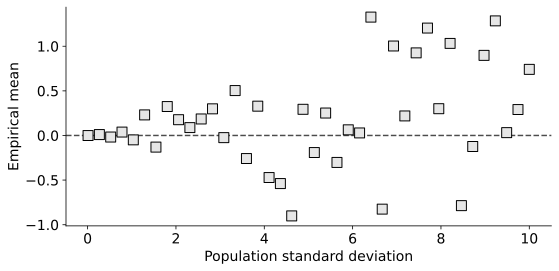

In [18]:
# the key factor to manipulate
stds = np.linspace(.01,10,40)

# parameters to hold constant
samplesize = 100
mean = 0


# initialize results matrix
results = np.zeros(len(stds))


# start the experiment
for stdi in range(len(stds)):

  # data parameters for this experiment run
  thisStd = stds[stdi]

  # generate data
  data = np.random.normal(mean,thisStd,samplesize)

  # collect results
  results[stdi] = np.mean(data)


# plot the results
plt.figure(figsize=(8,4))
plt.plot(stds,results,'ks',markersize=10,markerfacecolor=(.9,.9,.9))

# add to the plot
plt.axhline(mean,linestyle='--',color=(.3,.3,.3),zorder=-1)
plt.xlabel('Population standard deviation')
plt.ylabel('Empirical mean')

plt.tight_layout()
plt.savefig('simdat_experiment1.png')
plt.show()

# Figure 5.9: A follow-up experiment

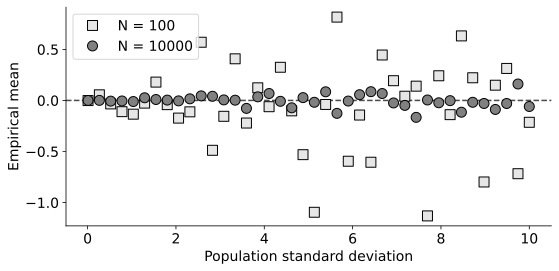

In [19]:
## the next experiment with two factors to manipulate

# the key factors to manipulate
stds = np.linspace(.01,10,40)
samplesizes = [100,10000]

# parameters to hold constant
meanvalue = 0


# initialize results matrix
results = np.zeros((len(stds),len(samplesizes)))

# start the experiment
for stdi in range(len(stds)):

  for sampi in range(len(samplesizes)):

    # data parameters for this experiment run
    thisStd = stds[stdi]
    thisN = samplesizes[sampi]

    # generate data
    data = np.random.normal(meanvalue,thisStd,samplesizes[sampi])

    # collect results
    results[stdi,sampi] = np.mean(data)


# plot the results
plt.figure(figsize=(8,4))
plt.plot(stds,results[:,0],'ks',markersize=10,markerfacecolor=(.9,.9,.9),label=f'N = {samplesizes[0]}')
plt.plot(stds,results[:,1],'ko',markersize=10,markerfacecolor=(.5,.5,.5),label=f'N = {samplesizes[1]}')

plt.axhline(meanvalue,linestyle='--',color=(.3,.3,.3),zorder=-1)

plt.xlabel('Population standard deviation')
plt.ylabel('Empirical mean')

plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('simdat_experiment2.png')
plt.show()

---
### My attempts at exercises

In [ ]:
# Exercise 1



---
### Original code

# Exercise 1

In [ ]:
# Reminder: the second input in np.random.normal is the standard deviation whereas the exercise specified the variance.
# You can input the square root of the variance.
X = np.random.normal(0,np.sqrt(2),size=10000)

# report the mean and variance
print(f'Empirical mean = {np.mean(X):.3f}')
print(f'Empirical variance = {np.var(X,ddof=1):.3f}')

In [ ]:
# sample sizes
Ns = np.arange(10,10200,step=200)

# initialize outputs
means = np.zeros(len(Ns))
vars  = np.zeros(len(Ns))

# run experiment
for i,n in enumerate(Ns):

  # generate random data
  X = np.random.normal(0,np.sqrt(2),size=n)
  # Note: the second input in np.random.normal is the standard deviation whereas the exercise specified the variance. But 1**2==1, so it works out here.

  # compute mean and variance
  means[i] = np.mean(X)
  vars[i]  = np.var(X,ddof=1)


# plot the results
_,axs = plt.subplots(2,1,figsize=(8,6))

axs[0].plot(Ns[[0,-1]],[0,0],'--',color=(.4,.4,.4))
axs[0].plot(Ns,means,'ks',markerfacecolor=(.9,.9,.9),markersize=10)
axs[0].set(xlim=[-100,Ns[-1]+110],xlabel='Sample size')
axs[0].set_title(r'$\bf{A}$)  Mean value (expected 0)',loc='left')

axs[1].plot(Ns[[0,-1]],[2,2],'--',color=(.4,.4,.4))
axs[1].plot(Ns,vars,'ks',markerfacecolor=(.9,.9,.9),markersize=10)
axs[1].set(xlim=[-100,Ns[-1]+110],ylabel='Variance')
axs[1].set_xlabel('Sample size')
axs[1].set_title(r'$\bf{B}$)  Variance value (expected 2)',loc='left')


# final adjustments and export
plt.tight_layout()
plt.savefig('simdat_ex1.png')
plt.show()

# Exercise 2

In [ ]:
# uniform data with boundaries [-3,8]
a,b = -3,8
Y = np.random.uniform(a,b,size=1324)

# compute mean and variance discrepancies
meanDiff = np.mean(Y) - (a+b)/2
varDiff  = ( np.var(Y,ddof=1) - (b-a)**2/12 )**2

# print the results
print(f'Mean discrepancy (signed): {meanDiff:.3f}')
print(f'Variance discrepancy (squared): {varDiff:.3f}')

# histogram
plt.hist(Y,bins='fd')
plt.xlabel('Data values')
plt.ylabel('Count')
plt.show()

In [ ]:
# sample sizes
Ns = np.arange(10,10200,step=200)

# initialize outputs
means = np.zeros(len(Ns))
vars  = np.zeros(len(Ns))

# run experiment
for i,N in enumerate(Ns):

  # generate random data (sorting to ensure a>b!)
  a,b = np.sort( np.random.randint(-3,11,2) )
  Y = np.random.uniform(a,b,size=N)

  # compute mean and variance discrepancies
  means[i] = np.mean(Y) - (a+b)/2
  vars[i]  = ( np.var(Y,ddof=1) - (b-a)**2/12 )**2


# plot the results
_,axs = plt.subplots(2,1,figsize=(8,6))

axs[0].plot(Ns[[0,-1]],[0,0],'--',color=(.4,.4,.4))
axs[0].plot(Ns,means,'ks',markerfacecolor=(.9,.9,.9),markersize=8)
axs[0].set(xlim=[-100,Ns[-1]+110],xlabel='Sample size',ylabel='Mean discrepancy')
axs[0].set_title(r'$\bf{A}$)  Mean value difference (expected 0)',loc='left')

axs[1].plot(Ns[[0,-1]],[0,0],'--',color=(.4,.4,.4))
axs[1].plot(Ns,vars,'ks',markerfacecolor=(.9,.9,.9),markersize=8)
axs[1].set(xlim=[-100,Ns[-1]+110],ylabel='Squared var discrepancy')
axs[1].set_xlabel('Sample size')
axs[1].set_title(r'$\bf{B}$)  Variance difference (expected 0)',loc='left')


# export
plt.tight_layout()
plt.savefig('simdat_ex2.png')
plt.show()

# Exercise 3

In [ ]:
# parameters
mu = 2
sigma = 1.5

# normally distributed numbers
normal = np.random.normal(0,1,size=10000)

# transform to log-normal
lognorm = np.exp(normal*sigma + mu)

# compute the empirical mean
empMean = np.mean(lognorm)

# and back-transform
empMeanInv = np.log(empMean) - sigma**2/2

# report the mean and its transform
print(f'Mean of log-normal data is {empMean:.3f}')
print(f'Transformed mean of log-normal data is {empMeanInv:.3f}')

In [ ]:
mus = np.linspace(1,10,13)

means = np.zeros(len(mus))

for i,m in enumerate(mus):

  # normally distributed data (different implementation compared to the previous code just to show multiple correct answers)
  normal = np.random.randn(10000)*sigma + m

  # transform to log-normal
  lognorm = np.exp(normal)

  # empirical mean
  means[i] = np.mean( lognorm )

  # Of course, you could condense this to one line:
  #means[i] = np.mean( np.exp(np.random.randn(10000)*sigma+m) )


# plotting
_,axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(mus,means,'ks-',markerfacecolor=(.9,.9,.9),markersize=8)
axs[0].set(xlabel=r'$\mu$',ylabel=r'$\overline{Y}$')

axs[1].plot(mus,np.log(means)-sigma**2/2,'ks-',markerfacecolor=(.9,.9,.9),markersize=8)
axs[1].set(xlabel=r'$\mu$',ylabel=r'$\ln(\overline{Y})-\frac{1}{2}\sigma^2$')


plt.tight_layout()
plt.savefig('simdat_ex3.png')
plt.show()

In [ ]:
# you can also compare by subtraction:
np.log(means)-sigma**2/2 - mus
# discrepancies are not exactly zero, but they are around 6 orders of magnitude smaller than np.mean(lognorm)!

# Exercise 4

In [ ]:
a,b = np.sort( np.random.randint(-3,11,2) )
N = 1001
Y = np.random.uniform(a,b,size=N)

# means according to the formulas
mu_a = np.sqrt(3)*np.std(Y,ddof=1) + a
mu_b = b - np.sqrt(3)*np.std(Y,ddof=1)

# print
print(f'mu from a : {mu_a:.4f}')
print(f'mu from b : {mu_b:.4f}')
print(f'mean(Y)   : {np.mean(Y):.4f}')
print(f'avg bounds: {(a+b)/2:.4f}')

In [ ]:
# stds according to the formulas
sig_a = (np.mean(Y)-a)/np.sqrt(3)
sig_b = (b-np.mean(Y))/np.sqrt(3)

print(f'sigma from a : {sig_a:.4f}')
print(f'sigma from b : {sig_a:.4f}')
print(f'std(Y)       : {np.std(Y,ddof=1):.4f}')

In [ ]:
# now to simulate data from mu/sigma parameters

# desired parameters
mu = 3.5
sig = 1.8

# generate the data
U = np.random.uniform(0,1,size=100000)
Y = mu + np.sqrt(3)*sig*(2*U-1)

print(f'Empirical mean: {np.mean(Y):.3f}')
print(f'Empirical std : {np.std(Y,ddof=1):.3f}')

# Exercise 5

In [ ]:
# Expected median is the same as the mean: (a+b)/2
#
# Expected mode is any/all values! The probability of any one value is the same as that of any other value.
# Of course, in a finite sample, there is likely to be one or a small number of modes due to sampling variability.

# Exercise 6

In [ ]:
# reference: https://en.wikipedia.org/wiki/Triangular_distribution

In [ ]:
# parameters
a = .2
c = .6
b = .9
N = 10000 # sample size

# function F(c) (as defined in wiki page)
Fc = (c-a) / (b-a)

# initialize U and y
U = np.random.rand(N)
y = np.zeros(N)

# apply transformation
y[U<Fc] = a + np.sqrt( U[U<Fc]*(b-a)*(c-a) )
y[U>Fc] = b - np.sqrt( (1-U[U>Fc])*(b-a)*(b-c) )


# create a histogram
plt.figure(figsize=(8,4))
plt.hist(y,'fd',color=(.8,.8,.8),edgecolor='k')
plt.xlim([a-.2,b+.2])
plt.xlabel('Data values')
plt.ylabel('Counts')
plt.title(f'Triangular distribution with a={a}, b={b}, c={c}',loc='center')

plt.tight_layout()
plt.savefig('simdat_ex6.png')
plt.show()

In [ ]:
# repeat using numpy function
Y = np.random.triangular(a,c,b,size=N)

# create a histogram
plt.figure(figsize=(8,4))
plt.hist(Y,'fd',color=(.8,.8,.8),edgecolor='k')
plt.xlim([a-.2,b+.2])
plt.xlabel('Data values')
plt.ylabel('Counts')
plt.title(f'Triangular distribution with a={a}, b={b}, c={c}',loc='center')
plt.show()

# Exercise 7

In [ ]:
# create an normally distributed integer dataset from a standard normal

# rounding a standard normal
X = np.random.normal(loc=0,scale=1,size=100000)
X = np.round(X)

# notice there are only 9 unique values:
print(np.unique(X))

# the histogram looks... thin
plt.hist(X,bins='fd')
plt.title(f'{len(np.unique(X))} unique numbers',loc='center')
plt.show()

In [ ]:
# Technically, the solution above is correct, but it feels unsatisfying to me,
# because the number of unique elements is so small. A simple solution is to
# increase the width of the distribution.


# rounding a normal with larger sigma
X = np.random.normal(loc=0,scale=15,size=100000)
X = np.round(X)

# the histogram looks better
plt.hist(X,bins='fd')
plt.title(f'{len(np.unique(X))} unique numbers',loc='center')
plt.show()

# Exercise 8

In [ ]:
N = 100

# create the data matrix
M = np.random.randn(N,2)
M[:,1] += M[:,0]

# correlation coefficient
# Note: the output is a matrix, and we want an off-diagonal element. You'll understand this in Chapter 12.
r_real = np.corrcoef(M.T)[1,0]

In [ ]:
# now to shuffle the data
ridx = np.random.permutation(N)

# make a copy of the data
Mshuf = M.copy()
Mshuf[:,0] = Mshuf[ridx,0]

# new correlation
r_shuf = np.corrcoef(Mshuf.T)[1,0]

# report the real and shuffled correlation coefficients
# (not formally requested in the text, but a nice addition ;)  )
print(f'Real correlation     r = {r_real:.3f}')
print(f'Shuffled correlation r = {r_shuf:.3f}')

In [ ]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(M[:,0],M[:,1],'ko')
axs[0].set(xlabel='Variable x',ylabel='Variable y')
axs[0].set_title(f'$\\bf{{A}}$) Real correlation r={r_real:.2f}')

axs[1].plot(Mshuf[:,0],Mshuf[:,1],'ko')
axs[1].set(xlabel='Variable x (shuffled)',ylabel='Variable y')
axs[1].set_title(f'$\\bf{{B}}$) Shuffled correlation r={r_shuf:.2f}')


plt.tight_layout()
plt.savefig('simdat_ex8.png')
plt.show()

# Exercise 9

In [ ]:
import scipy.stats as stats

# sample size
N = 3000

# run one of these lines...
# data = stats.exponnorm.rvs(3,size=N)
# data = stats.norm.rvs(loc=3,scale=1,size=N)
data = stats.laplace.rvs(size=N)
# data = stats.gumbel_r.rvs(size=N)

# descriptives
mean = np.mean(data)
std  = np.std(data,ddof=1)

# histograms via numpy
yy,xx = np.histogram(data,bins='fd')
xx = (xx[:-1]+xx[1:])/2

# find bars within 1 std of the mean
closeBars = np.logical_and(xx>(mean-std), xx<(mean+std))


# show me the data!
_,axs = plt.subplots(1,2,figsize=(10,4))

# scatter plot of the data
axs[0].plot(data,'o',color=(.3,.3,.3),markerfacecolor=(.8,.8,.8),alpha=.2)
axs[0].axhline(mean-std,linestyle='--',linewidth=2,color='k')
axs[0].axhline(mean+std,linestyle='--',linewidth=2,color='k')

axs[0].set(xlabel='Data index',ylabel='Data value',xlim=[-10,len(data)+10])
axs[0].set_title(r'$\bf{A})$  Raw data values')

# now show the histogram
axs[1].bar(xx[~closeBars],yy[~closeBars],width=30/len(xx),color=(.7,.7,.7),edgecolor=None,label=r'$x>(\overline{x}\pm\sigma)$')
axs[1].bar(xx[closeBars],yy[closeBars],width=30/len(xx),color=(.2,.2,.2),edgecolor=None,label=r'$x\in(\overline{x}\pm\sigma)$')

axs[1].set(xlabel='Data value',ylabel='Count')
axs[1].legend()
axs[1].set_title(r'$\bf{B})$  Data histogram')


plt.tight_layout()
plt.savefig('simdat_ex9.png')
plt.show()

In [ ]:
# Link to a list of distributions you can try
# https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions
# (For this exercise, use only 'continuous' distributions.)

# Exercise 10

In [ ]:
# the key factors to manipulate
stds = np.linspace(.01,10,40)

# parameters to hold constant
samplesize = 10000
mean = 0


# initialize results matrix
results = np.zeros(len(stds))
expectedMean = np.zeros(len(stds))


# start the experiment
for stdi in range(len(stds)):

  # data parameters for this experiment run
  thisStd = stds[stdi]

  # generate data
  X = np.random.normal(0,1,samplesize)
  data = np.exp(X*thisStd + mean)

  # collect results
  results[stdi] = np.mean(data)

  # expected average
  expectedMean[stdi] = np.exp(mean + thisStd**2/2)


# plot the results
plt.figure(figsize=(8,4))
plt.plot(stds,np.log(results),'ks',markersize=10,markerfacecolor=(.9,.9,.9))
plt.plot(stds,np.log(expectedMean),'k--')

# add to the plot
plt.xlabel('Standard deviation')
plt.ylabel('Empirical mean (log)')

plt.tight_layout()
plt.savefig('simdat_ex10a.png')
plt.show()

In [ ]:
# values of sigma to illustrate
sigmas = [1,10]

# prepare the figure
_,axs = plt.subplots(1,2,figsize=(10,4))


# make the figure
for i,s in enumerate(sigmas):

  # generate data
  Y = np.exp(np.random.randn(10000)*s)

  # plot the results
  axs[i].hist(np.log(Y),bins=100,color='k',label='Data')
  axs[i].axvline(x=np.log(np.mean(Y)),color='gray',label='Mean')


# prettify both axes
axs[0].set_title(f'$\\bf{{A}}$)  $\\sigma$ = {sigmas[0]}',loc='left')
axs[1].set_title(f'$\\bf{{B}}$)  $\\sigma$ = {sigmas[1]}',loc='left')
for a in axs:
  a.set(xlabel='ln(data) value',ylabel='Count')
  a.legend()

plt.tight_layout()
plt.savefig('simdat_ex10b.png')
plt.show()